In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [2]:
df = pd.read_csv("../1_Data/transformed_loan_approval_dataset.csv")

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,debt_to_income,loan_to_assets,cibil_bucket
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,3.114583,0.589744,2
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,2.975609,0.717647,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,3.263736,0.514731,1
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,3.743902,0.582543,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,2.469388,0.440000,0


In [3]:
# Split features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
model_metrics = {}

In [4]:
# Helper function to evaluate and print metrics
def evaluate_model(name, y_true, y_pred):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }
    model_metrics[name] = metrics
    print(f"\nResults for {name}")
    for k, v in metrics.items():
        print(f"{k}: {v:.5f}")

In [5]:
# Logistic Regression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
evaluate_model("Logistic Regression", y_test, y_pred_logreg)


Results for Logistic Regression
Accuracy: 0.90749
Precision: 0.91544
Recall: 0.93785
F1 Score: 0.92651


In [6]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model("Random Forest", y_test, y_pred_rf)


Results for Random Forest
Accuracy: 0.99883
Precision: 0.99812
Recall: 1.00000
F1 Score: 0.99906


In [7]:
# Support Vector Machine

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
evaluate_model("SVM", y_test, y_pred_svm)


Results for SVM
Accuracy: 0.93911
Precision: 0.93625
Recall: 0.96798
F1 Score: 0.95185


In [8]:
# XGBoost

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Results for XGBoost
Accuracy: 0.99649
Precision: 0.99624
Recall: 0.99812
F1 Score: 0.99718


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

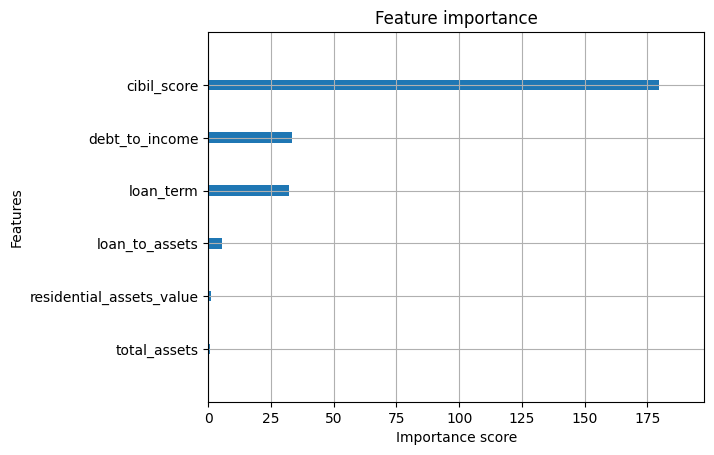

In [9]:
# Display important features used in XGBoost
xgb.get_booster().feature_names = X.columns.tolist()

plot_importance(xgb, importance_type='gain', show_values=False)
